#IMPORT DATASET

In [ ]:
# Authenticate
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
!wget 'https://github.com/ThanhChinhBK/vietnews/archive/master.zip'
!unzip 'master.zip'

Streaming output truncated to the last 5000 lines.
  inflating: vietnews-master/data/val_tokenized/017643.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017644.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017645.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017646.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017647.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017648.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017649.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017650.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017651.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017652.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017653.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017654.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017655.txt.seg  
  inflating: vietnews-master/data/val_tokenized/017656.txt.seg  
  inflating: vietnews-master/data/val_t

In [ ]:
%%capture

# !wget 'https://github.com/CLC-HCMUS/ViMs-Dataset/raw/master/ViMs.zip'
# !unzip 'ViMs.zip'

# Install the vncorenlp python wrapper
!pip install vncorenlp

# Download VnCoreNLP-1.1.1.jar & its word segmentation component (i.e. RDRSegmenter) 
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/ 
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/
!pip install datasets==1.0.2

In [ ]:
import glob
import pandas as pd
import concurrent.futures
from datasets import *

## Processing data

In [ ]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("./vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx2g') 

In [ ]:
def listPaths(path):
  pathfiles = list()
  for pathfile in glob.glob(path):
    pathfiles.append(pathfile)
  return pathfiles

train_paths = listPaths('/content/vietnews-master/data/train_tokenized/*')
val_paths = listPaths('/content/vietnews-master/data/val_tokenized/*')
test_paths = listPaths('/content/vietnews-master/data/test_tokenized/*')

In [ ]:
def read_content(pathfile):
  """
  Input: Path of txt file
  Output: A dictionary has keys 'original' and 'summary'
  """
  with open(pathfile) as f:
    rows  = f.readlines()
    original = ' '.join(''.join(rows[4:]).split('\n'))
    summary = ' '.join(rows[2].split('\n'))
          
  return {'file' : pathfile,
            'original': original, 
            'summary': summary}

In [ ]:
read_content(train_paths[0])

{'file': '/content/vietnews-master/data/train_tokenized/056469.txt.seg',
 'original': 'Tên_lửa Hwasong -14 được Triều_Tiên phóng hồi tháng 7 . Triều_Tiên lúc 3h sáng nay phóng một tên_lửa_đạn_đạo Hwasong -15 từ khu_vực đông bắc thủ_đô Bình_Nhưỡng xuống biển Nhật_Bản . Hội_đồng Tham_mưu_trưởng Liên_quân Hàn_Quốc cho_biết tên_lửa bay trong 54 phút , đạt độ cao 4.500 km và tầm_xa 960 km . Giới quan_sát cho_rằng Hwasong -15 chính là phiên_bản cải_tiến của tên_lửa_đạn_đạo xuyên lục_địa ( ICBM ) Hwasong -14 , từng được Triều_Tiên phóng thử hồi tháng 7 . Nếu được bắn theo quỹ_đạo tối_ưu , Hwasong -15 có_thể đạt tầm bắn hơn 13.000 km . Các chuyên_gia nhận_định qua vụ phóng lần này , Triều_Tiên đã thể_hiện chiến_thuật " đòn chớp_nhoáng " để có_thể bất_ngờ tấn_công các mục_tiêu lớn trên lãnh_thổ Mỹ , theo Bussiness_Insider . Chuyên_gia quân_sự Alex_Lockie cho_biết Triều_Tiên thường hạn_chế phóng tên_lửa vào ban_đêm hoặc trong thời_tiết giá_lạnh , nhưng vụ phóng tên_lửa Hwasong -15 lúc 3h sáng mộ

In [ ]:
def get_dataframe(pathfiles):
  with concurrent.futures.ProcessPoolExecutor() as executor:
    data = executor.map(read_content, pathfiles)
  
  # Make blank dataframe
  data_df = list()
  for d in data:
    data_df.append(d)
  data_df = pd.DataFrame(data_df)
  data_df.dropna(inplace = True)
  data_df = data_df.sample(frac=1).reset_index(drop=True)

  return data_df

In [ ]:
# train_df = get_dataframe(train_paths)

In [ ]:
df = get_dataframe(val_paths)
# test_df = get_dataframe(test_paths)

In [ ]:
df.head()

,file,original,summary
0,/content/vietnews-master/data/val_tokenized/00...,Nhiệm_vụ cụ_thể của những người tham_gia chỉ l...,Mẩu tuyển_dụng tưởng chỉ trong … mơ này lại có...
1,/content/vietnews-master/data/val_tokenized/00...,Tàu_đổ_bộ USS Bonhomme_Richard của Mỹ trong mộ...,Australia triển_khai kế_hoạch xây cảng biển mớ...
2,/content/vietnews-master/data/val_tokenized/00...,"Trưa 27/8 , Công_an tỉnh Bình_Dương cùng các đ...",Thi_thể một người đàn_ông trên cổ còn quấn dây...
3,/content/vietnews-master/data/val_tokenized/00...,"Bà Vũ_Thị_Thanh_Vân , trưởng_Phòng Giáo_dục - ...","Chiều 21-9 , hai học_sinh Trường THCS Đào_Duy_..."
4,/content/vietnews-master/data/val_tokenized/00...,Hãng tin Reuters dẫn nguồn từ cảnh_sát Zimbabw...,Ít_nhất 42 người đã thiệt_mạng và 27 người khá...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22642 entries, 0 to 22641
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   file      22642 non-null  object
 1   original  22642 non-null  object
 2   summary   22642 non-null  object
dtypes: object(3)
memory usage: 530.8+ KB


#EXPLORATORY DATA ANALYSIS

In [14]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

Số lượng từ trong tiêu đề tóm tắt (summary)

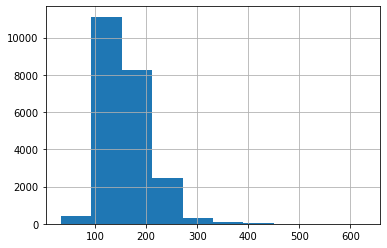

In [17]:
df['summary'].str.len().hist()

Số lượng từ trong bài báo gốc(original)

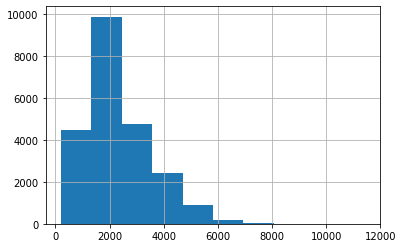

In [18]:
df['original'].str.len().hist()

Word cloud

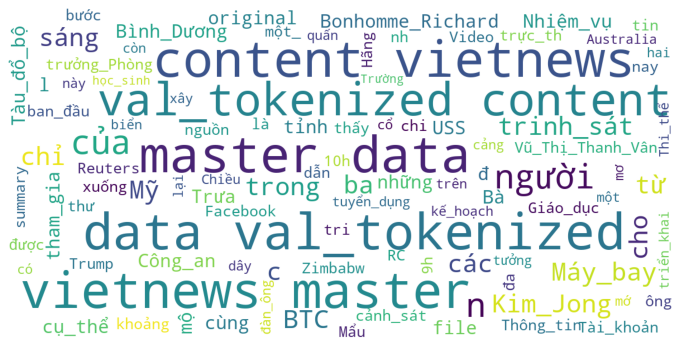

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df)